# Machine Learning: Decision Tree Regressor with Startups Investment Data Set

We have touched upon the basics of machine learning from previous notebooks such as Simple Linear Regression and Multivariate Linear Regression. Besides the underlying assumptions that these machines are limited to, structures such as non-linearity or hierarchical relationships may popse difficulties for regression models. On top of that, we can only explain our dependent variable on a marginal basis which means we can also what each $x$ affects $y$ individually and we cannot make arguments of how $x_1$ and $x_2$ together create impacts on $y$. 

The above discussion exposed the motivation for us to move above regression analysis. A standard procedure is to use tree-base learning algorithms. The most famous one is Decision Tree Regressor. In this notebook, we are going to cover the following

- $\textbf{Environment Initiation}$. I always start with initiating the environment. I import the correct modules, APIs, and libraries that need to be used for this notebook and I set up my data set.

- $\textbf{Data Cleanup}$. Data set cleanup is very important. In real world, not all data are saved properly and it is our duty as a data scientist and machine learning practitioner to ensure that the data is valid and can be processed by machines.

- $\textbf{Machine Learning: Decision Tree Regressor}$. Every notebook has a purpose and in this case I want to focus on building a Decision Tree Regresssor in a data science project. It is crucial to have a starting explanation to introduce the main structure of this learning algorithm.

- $\textbf{Machine Learning: Training, Testing, and Visualization}$. We want to ensure the robustness of a machine throughout the training procedure. We split the data into training set and testing set so that we can ensure the sample used on testing shows the real and unbiased performance of decision tree regressor. The benefit of using tree-based learning algorithm is the power of interpretability. We use *export_graphviz* from *sklearn* to allow python to present the graphs of the machine we have just trained.

- $\textbf{Software Development / Product Management}$. Every data science project has two phases. Phase I is about end-to-end research and select the most optimal machine learning procedure. Phase II is about delivering a software product to consumer and clients so that the python codes can be called and there is no need to redo everything that has already been done.

## Environment Initiation

Let us start by importing all the packages and start to download the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('~/OneDrive/Documents/YinsPy/data/startups_invest.csv')

In [3]:
print(data.head(3)) # preview first three rows

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39


In [4]:
print(data.iloc[:3, :-1]) # preview the first three rows and all columns except for the last one

   R&D Spend  Administration  Marketing Spend       State
0  165349.20       136897.80        471784.10    New York
1  162597.70       151377.59        443898.53  California
2  153441.51       101145.55        407934.54     Florida


## Data Cleanup

Data set cleanup is extremely important. In real world, there are lots of data that are dirty and cannot be processed by python interpreter or any other APIs. It is our job to ensure that the data is in the correct data frame or other formats that the machine can process.

In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, data.shape[1]-1]

In [6]:
State = pd.get_dummies(X.iloc[:, 3], drop_first=True)
print(State.head(3)) # preview first three rows

   Florida  New York
0        0         1
1        0         0
2        1         0


In [7]:
X.drop('State', axis = 1, inplace = True)

In [8]:
print(X.head(3))

   R&D Spend  Administration  Marketing Spend
0  165349.20       136897.80        471784.10
1  162597.70       151377.59        443898.53
2  153441.51       101145.55        407934.54


In [9]:
X = pd.concat([X, State], axis = 1)
print(X.head(3))

   R&D Spend  Administration  Marketing Spend  Florida  New York
0  165349.20       136897.80        471784.10        0         1
1  162597.70       151377.59        443898.53        0         0
2  153441.51       101145.55        407934.54        1         0


## Machine Learning: Decision Tree Regressor

Decision Tree Regressor is a tree-based learning algorithm that carries out a prediction problem. Let us start with the notion of decision tree. A decision tree constructs recursive partitioning. The structure starts with a root node, known as a parent. Each node can be split into left and right child nodes. These nodes can be split further down the branches depending on the needs of the data set. Note that in practice you may end up creating many nodes which may cause overfitting. We are going to have to prune the tree by setting up the max depth. After we have splitted the features, we can use regression model to carry out the final predictions.

## Machine Learning: Training a Decision Tree Regressor

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.tree import DecisionTreeRegressor
DecTreeRegressor = DecisionTreeRegressor()
DecTreeRegressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Training set performance

In [12]:
y_pred_train = DecTreeRegressor.predict(X_train)
from sklearn.metrics import r2_score
score_train = r2_score(y_pred_train, y_train)
RMSE = (score_train/X_train.shape[0])**(0.5)
print('Training Set is ', RMSE)

Training Set is  0.15811388300841897


How do we interpret this results? We obtained the trained machines from above and we want to see how accurate it is on training data. We can check out the root mean square error. This is computed by using *r2_score* from *sklearn* package. The metric *r2_score* is the summation of residual squares, e.g. the mathematical form
$$\text{Residual}^2 = \sum (\hat{y} - y)^2$$
and we want to use this metric to create root mean square for our particular example so we compute the following
$$\text{RMSE} = \sqrt{\frac{1}{n}\text{Residual}^2}$$
and $n$ is referring to sample size in the particular experiment (in this case it is training set sample size, later on it is testing set sample size). 

We have the training set performance measured in RMSE from results above. The error means our trained machine can predicts the dependent variable within an error range of the RMSE on average. 

## Machine Learning: Testing a Decision Tree Regressor


In [13]:
y_pred_test = DecTreeRegressor.predict(X_test)
score_test = r2_score(y_pred_test, y_test)
RMSE_test = (score_test/X_test.shape[0])**(0.5)
print('Testing Set is ', RMSE_test)

Testing Set is  0.3111445235866479


## Visualization

What does this piece of machine does? It is a Decision Tree Regressor and the nature of this machine dictates that we have to make splits of the features in our data. This is clear by definition, but exactly how does it split the features?

In [14]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

C:\Users\eagle\AppData\Roaming\Python\Python36\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [15]:
features = list(X_train)
print(features)

['R&D Spend', 'Administration', 'Marketing Spend', 'Florida', 'New York']


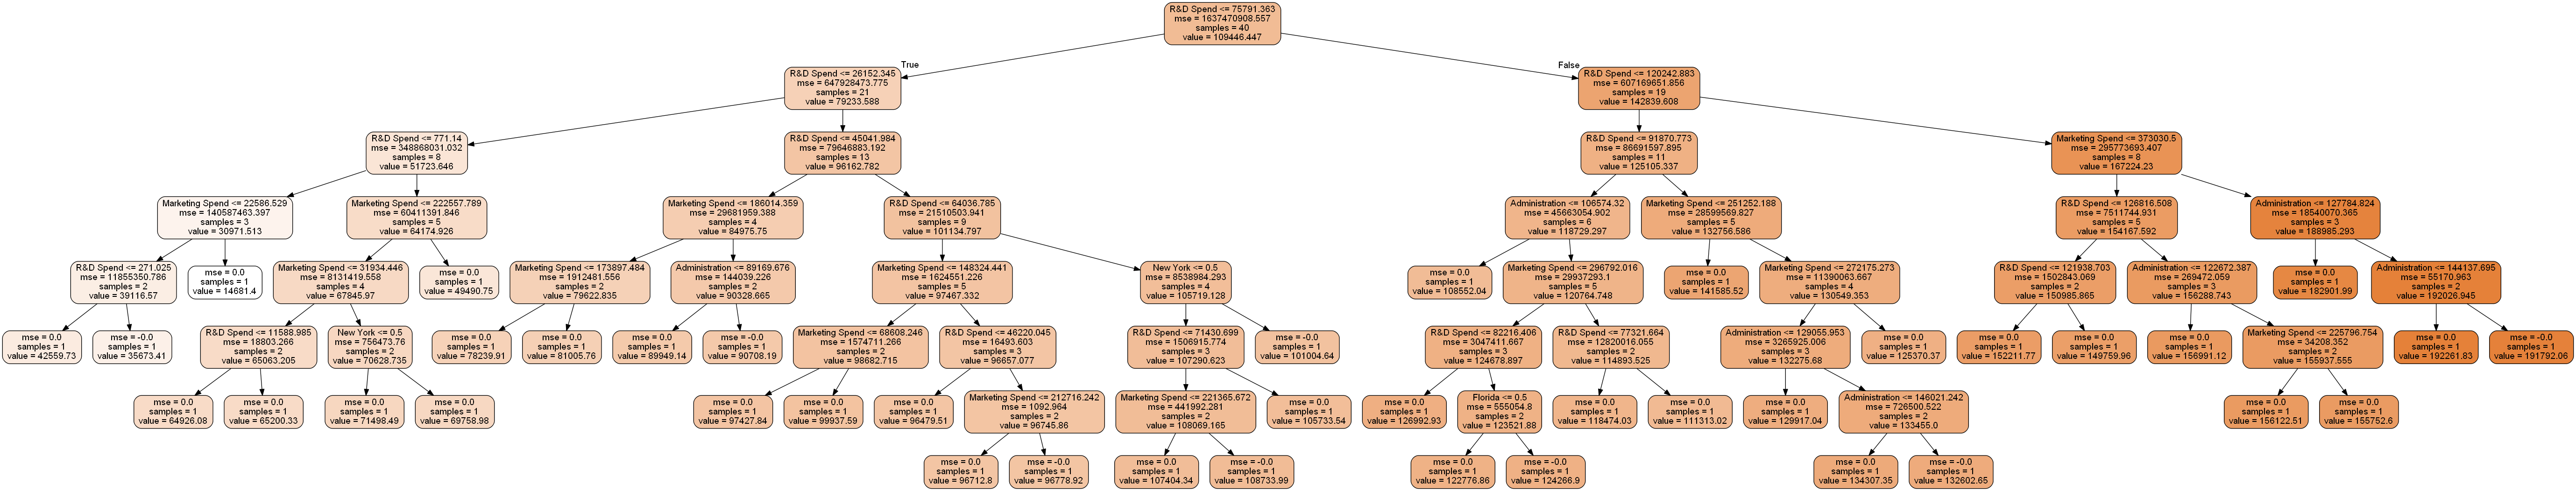

In [16]:
dot_data = StringIO()
export_graphviz(DecTreeRegressor, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png()) # double click the graph below to zoom in and double click again to zoom out

## Software Development / Product Management

From about analysis, we have established a list of steps we execute to carry out a simple linear regression analysis. Each step is clear written and can be examined for reference. 

Now it is time to pack everything together into a function so that the above analysis can be summarized into a word and can be pulled for future usage without having to code everything again. Once this software is developed we can get the product shipped to employers or clients and we will be starting negotiation as well as software maintainance (which is crucial for product management)

In [20]:
# Define function
def ML_DecisionTreeRegressor(X, y, test_set_size, max_depth_size):
    # Environment Initiation
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    
    # Generate Data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_set_size, random_state = 0)
    
    # ML: Training
    from sklearn.tree import DecisionTreeRegressor
    DecTreeRegressor = DecisionTreeRegressor(max_depth=max_depth_size)
    DecTreeRegressor.fit(X_train, y_train)
    y_pred_train = DecTreeRegressor.predict(X_train)
    from sklearn.metrics import r2_score
    score_train = r2_score(y_pred_train, y_train)
    RMSE = (score_train/X_train.shape[0])**(0.5)
    
    # ML: Testing
    y_pred_test = DecTreeRegressor.predict(X_test)
    score_test = r2_score(y_pred_test, y_test)
    RMSE_test = (score_test/X_test.shape[0])**(0.5)
    
    # Visualization
    from IPython.display import Image
    from sklearn.externals.six import StringIO
    from sklearn.tree import export_graphviz
    import pydot
    features = list(X_train)
    dot_data = StringIO()
    export_graphviz(DecTreeRegressor, out_file=dot_data, feature_names=features, filled=True, rounded=True)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    Image(graph[0].create_png()) # double click the graph below to zoom in and double click again to zoom out
    
    # Output
    return {
        'Data': {
            'Features': features,
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'y_pred_train': y_pred_train,
            'y_pred_test': y_pred_test
        },
        'Decision Tree': DecTreeRegressor,
        'Training RMSE': RMSE,
        'Testing RMSE': RMSE_test,
        'Graph Info': graph
    }, Image(graph[0].create_png())
# End of function

Let us try to run it!

In [21]:
# Data
data = pd.read_csv('~/OneDrive/Documents/YinsPy/data/startups_invest.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, data.shape[1]-1]
State = pd.get_dummies(X.iloc[:, 3], drop_first=True)
X.drop('State', axis = 1, inplace = True)
X = pd.concat([X, State], axis = 1)

# Run
testresult, testresultgraph = ML_DecisionTreeRegressor(X, y, 0.3, max_depth_size = 4)

Training RMSE:  0.16854632168567793 
Testing RMSE: 0.2474111346727333
Let us print graph:


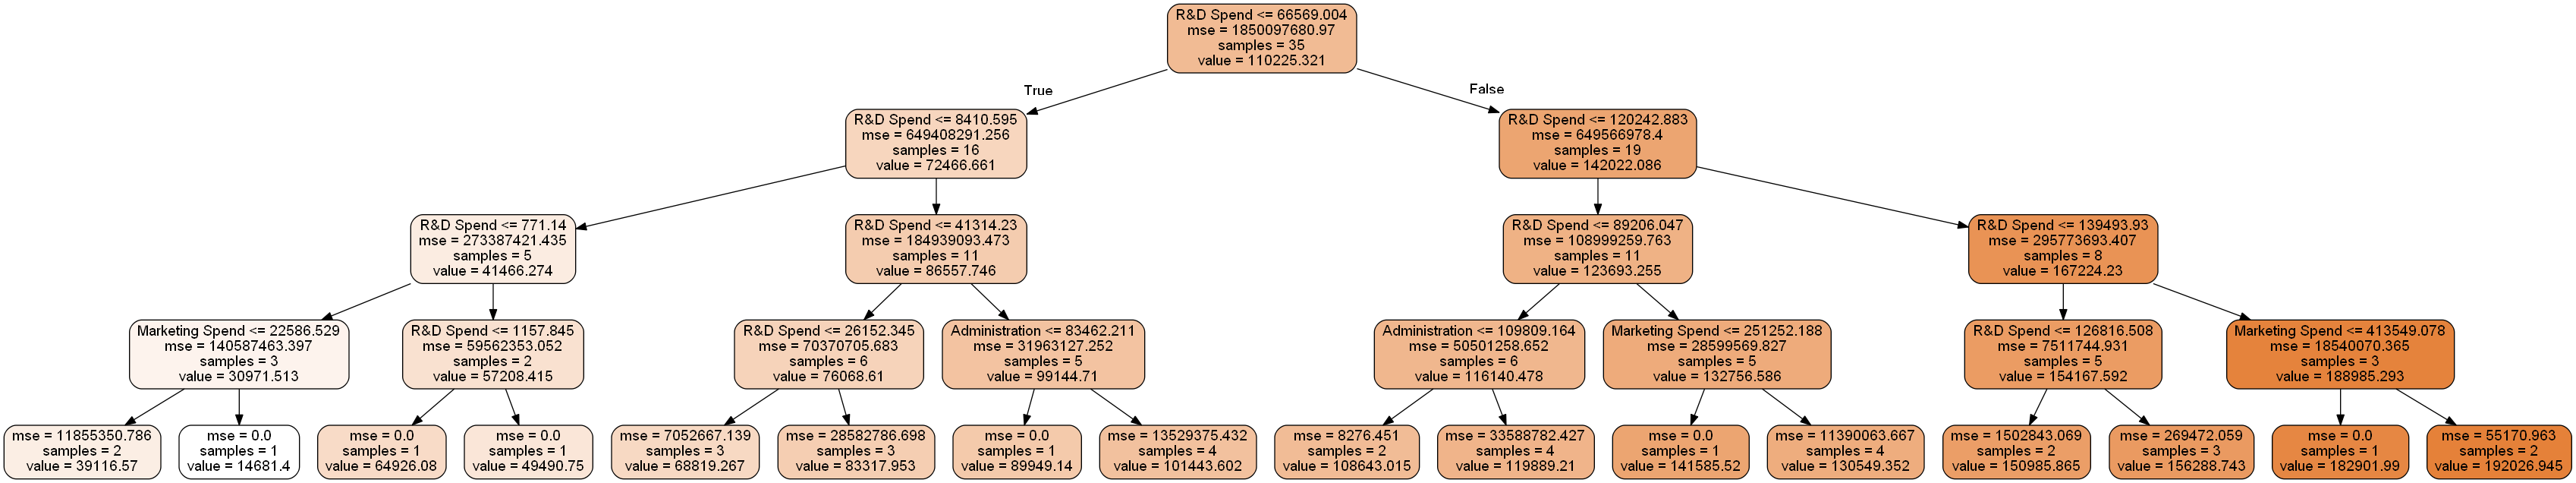

In [22]:
print('Training RMSE: ', testresult['Training RMSE'], '\nTesting RMSE:', testresult['Testing RMSE'])
print('Let us print graph:')
testresultgraph